In [ ]:
# Load R packages.
library("reshape2")
library("ggplot2")
library("grid")
library("dplyr")

In [2]:
# Load the results from the graph-analysis tool.  
results <- read.csv(url("https://raw.githubusercontent.com/mazlo/lod-graph-analysis/master/results/analysis_results.csv"), na.strings = "NA")

In [3]:
# Inspect the results.
head(results)
# Total: 280 observations (datasets), 41 variables

name,n,domain,m,parallel_edges,m_unique,avg_degree,avg_degree_centrality,avg_in_degree_centrality,avg_out_degree_centrality,⋯,powerlaw_exponent_in_degree_dmin,stddev_in_degree,stddev_out_degree,coefficient_variation_in_degree,coefficient_variation_out_degree,var_in_degree,var_out_degree,centralization_in_degree,centralization_out_degree,centralization_degree
abs-linked-data,131634287,Government,1489689235,50294,1489638941,22.6338,2.00e-07,1.00e-07,1.00e-07,,199050,13531.2419,2.5089,119567.00,22.17,183094507.78,6.2944,0.9783167,0.0000758,0.9783166
apertium-rdf-ca-it,66886,Linguistics,180858,15739,165119,5.4079,8.09e-05,4.04e-05,4.04e-05,,2,123.7670,50.2375,4577.23,1857.91,15318.27,2523.8077,0.2352660,0.1177025,0.2352256
apertium-rdf-en-ca,281314,Linguistics,759613,66058,693555,5.4005,1.92e-05,9.60e-06,9.60e-06,,4,252.0705,102.8162,9335.14,3807.68,63539.55,10571.1732,0.2347057,0.1174227,0.2346961
apertium-rdf-en-es,211965,Linguistics,576329,51661,524668,5.4380,2.57e-05,1.28e-05,1.28e-05,,4,219.1102,89.5845,8058.54,3294.78,48009.27,8025.3852,0.2433846,0.1218769,0.2433717
apertium-rdf-en-gl,154325,Linguistics,425124,40069,385055,5.5095,3.57e-05,1.79e-05,1.79e-05,,2,186.8478,77.1549,6782.79,2800.81,34912.08,5952.8820,0.2588176,0.1298405,0.2587997
apertium-rdf-eo-ca,155456,Linguistics,426308,39929,386379,5.4846,3.53e-05,1.76e-05,1.76e-05,,2,187.8876,77.1782,6851.44,2814.35,35301.75,5956.4750,0.2568253,0.1284456,0.2568076


# Basic Graph Measures

In [4]:
resplot <- ggplot(data=results, aes(x= reorder(m, -m))) 

## Number of nodes

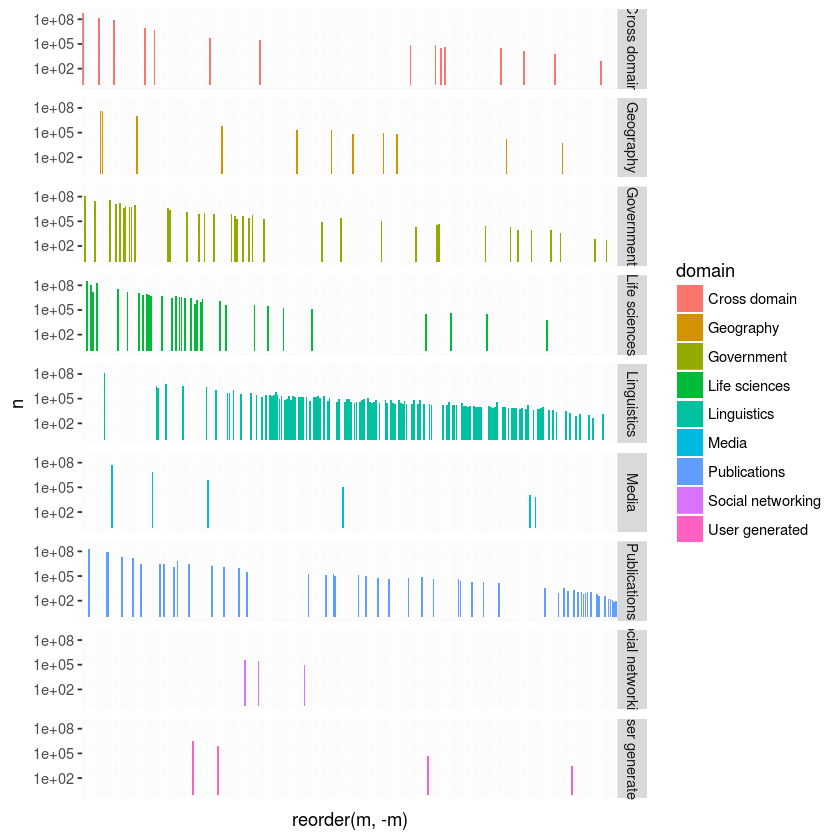

In [5]:
n_plot <- resplot + geom_bar(aes(y=n, fill=domain), position = "dodge", stat="identity") 
n_plot <- n_plot + facet_grid(domain ~ .) + scale_y_log10()
n_plot <- n_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
n_plot

## Number of edges

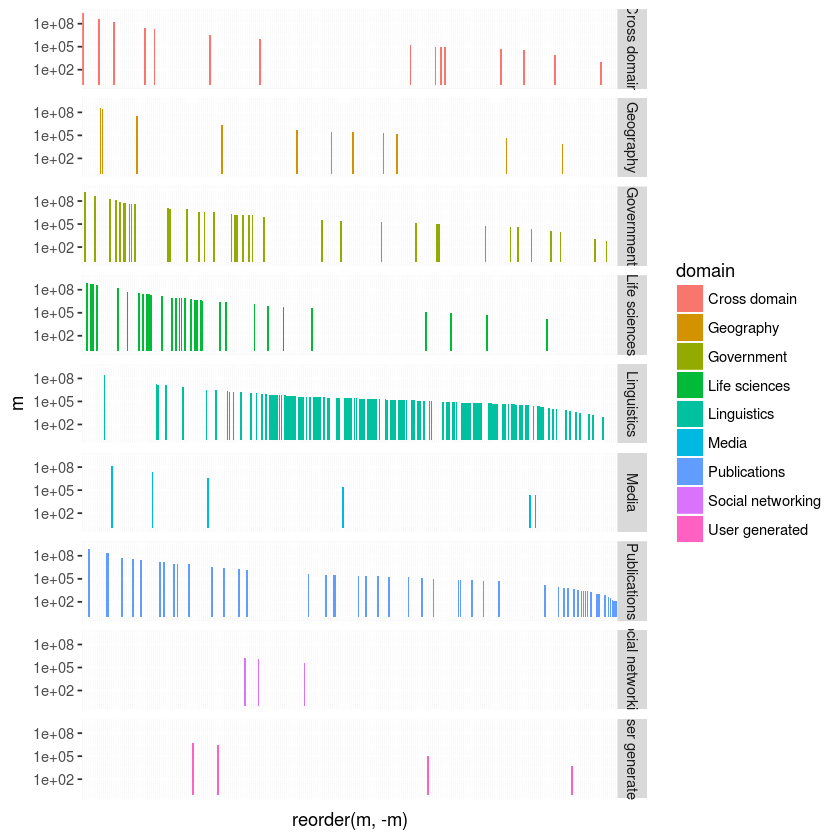

In [6]:
m_plot <- resplot + geom_bar(aes(y=m, fill=domain), position = "dodge", stat="identity") 
m_plot <- m_plot + facet_grid(domain ~ .) + scale_y_log10()
m_plot <- m_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
m_plot

## m-single/m

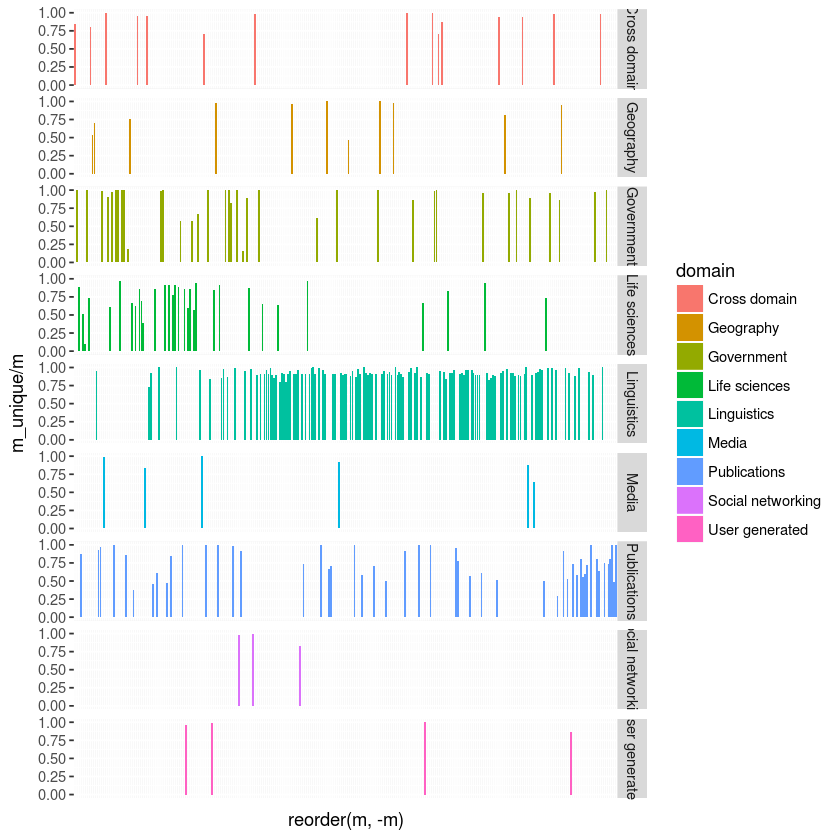

In [7]:
munique_plot <- resplot + geom_bar(aes(y=m_unique/m, fill=domain), position = "dodge", stat="identity") 
munique_plot <- munique_plot + facet_grid(domain ~ .)
munique_plot <- munique_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
munique_plot

## Density (fill-overall)

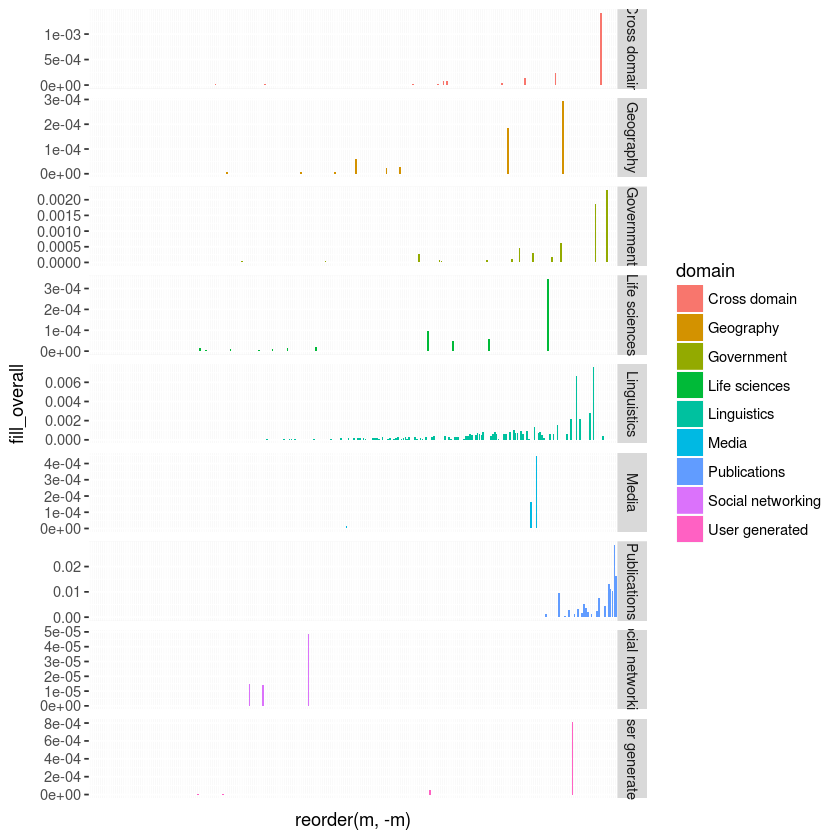

In [8]:
filloverall_plot <- resplot + geom_bar(aes(y=fill_overall, fill=domain), position = "dodge", stat="identity") 
filloverall_plot <- filloverall_plot + facet_grid(domain ~ ., scale="free_y")
filloverall_plot <- filloverall_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
filloverall_plot

# Degree-based Measures

## Average Degree, Std Dev InDegree, and Std Dev Out-Degree

In [9]:
# Melt degree results to plot multiple metrics in a single plot.
degree_results <- melt(results, id.vars=c("domain", "name", "m"), measure.vars=c("avg_degree", "stddev_in_degree", "stddev_out_degree"), variable.name="var")

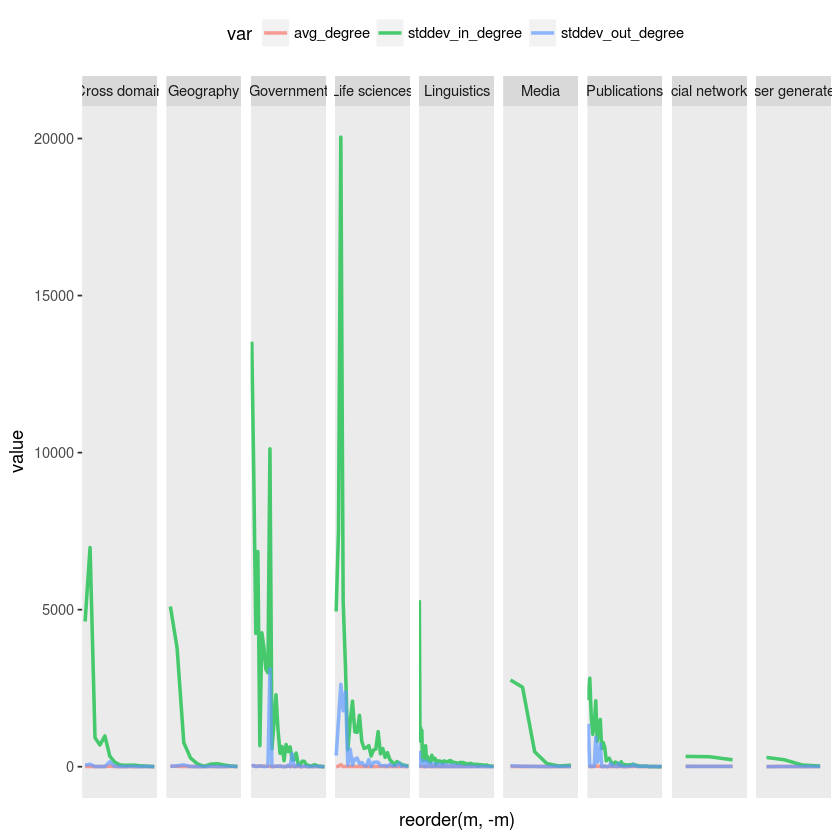

In [10]:
degree_plot <- ggplot(data=degree_results, aes(x=reorder(m, -m), y=value, color=var, group=var)) 
degree_plot <- degree_plot + geom_line(size=1, alpha=0.7)
degree_plot <- degree_plot + facet_grid(. ~ domain, scale="free")
degree_plot <- degree_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank(), panel.grid=element_blank(), legend.position="top")
degree_plot

In [11]:
# Mean degrees accross domains.
mean_degree_table <- aggregate(value~var+domain, data=degree_results, FUN=mean)
mean_degree_table <- dcast(mean_degree_table, domain~var) 
mean_degree_table

domain,avg_degree,stddev_in_degree,stddev_out_degree
Cross domain,5.464587,996.0946,23.398873
Geography,6.604827,936.1300,13.349682
Government,9.760665,1864.7016,106.547154
Life sciences,8.018875,1771.1045,350.428053
Linguistics,8.656755,215.1583,29.182935
Media,5.959833,989.4824,11.814983
Publications,6.260006,378.3302,84.899238
Social networking,8.922167,288.1741,9.853633
User generated,4.813125,147.2670,5.444850


## h-index

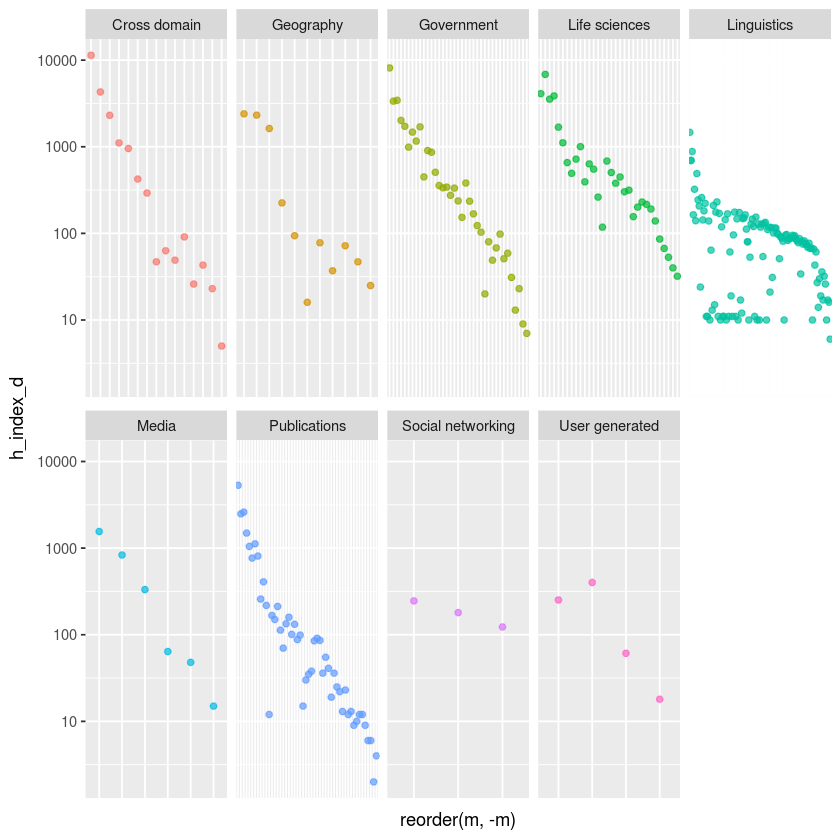

In [12]:
hindex_plot <- ggplot(data=results, aes(x=reorder(m, -m), y=h_index_d, color=domain)) 
hindex_plot <- hindex_plot + geom_point(alpha=0.7) + scale_y_log10(breaks=c(1, 10, 100, 1000, 10000)) 
hindex_plot <- hindex_plot + facet_wrap(~ domain, scale="free_x", nrow=2)
hindex_plot <- hindex_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + guides(color=FALSE)
hindex_plot

# Centrality Measures

## Centralization Degree

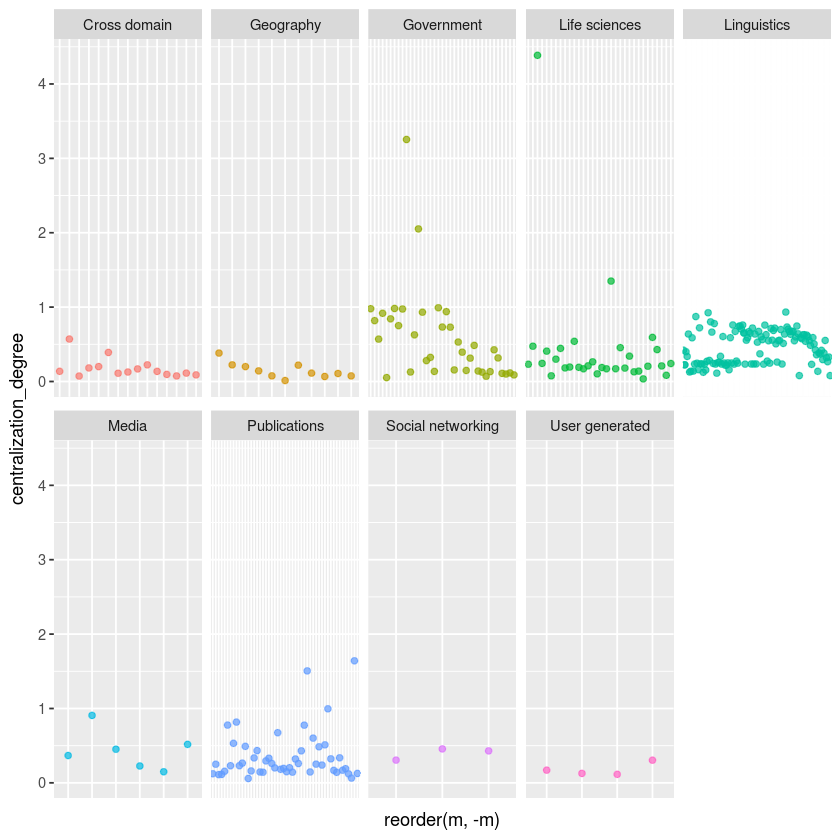

In [13]:
centralization_plot <- ggplot(data=results, aes(x=reorder(m, -m), y=centralization_degree, color=domain)) 
centralization_plot <- centralization_plot + geom_point(alpha=0.7) #+ scale_y_log10(breaks=c(1, 10, 100, 1000, 10000)) 
centralization_plot <- centralization_plot + facet_wrap(~ domain, nrow=2, scale="free_x")
centralization_plot <- centralization_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + guides(color=FALSE)
centralization_plot

# Edge-based Measures

# Reciprocity

Warning message:
"Removed 1 rows containing missing values (geom_point)."

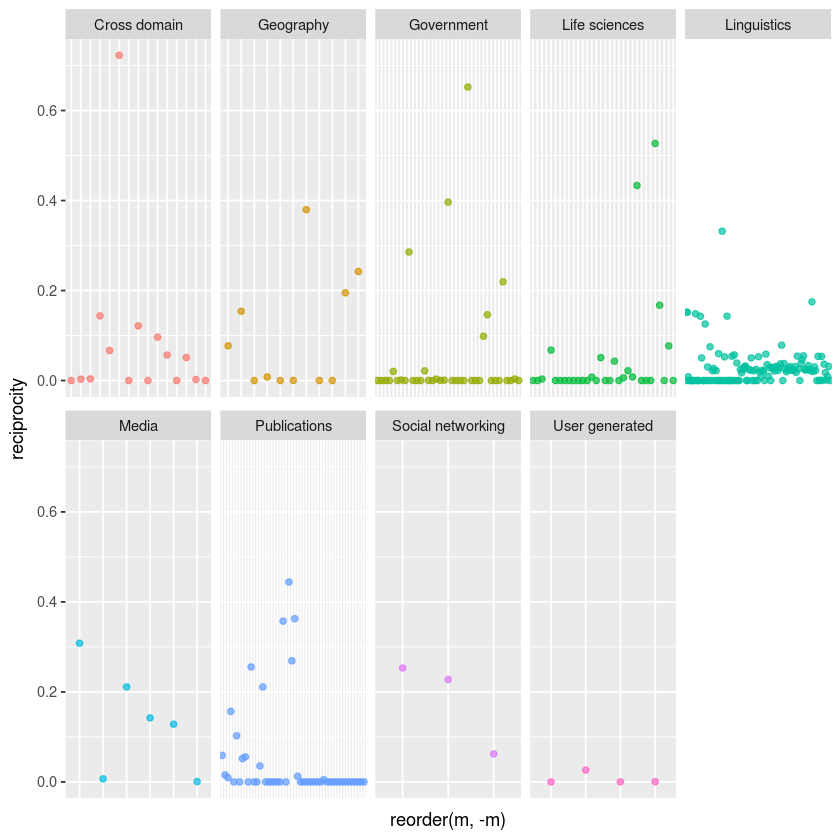

In [14]:
reciprocity_plot <- ggplot(data=results, aes(x=reorder(m, -m), y=reciprocity, color=domain)) 
reciprocity_plot <- reciprocity_plot + geom_point(alpha=0.7)
reciprocity_plot <- reciprocity_plot + facet_wrap(~ domain, scale="free_x", nrow=2)
reciprocity_plot <- reciprocity_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + guides(color=FALSE)
reciprocity_plot

## Pseudo-diameter

Warning message:
"Removed 1 rows containing missing values (geom_point)."

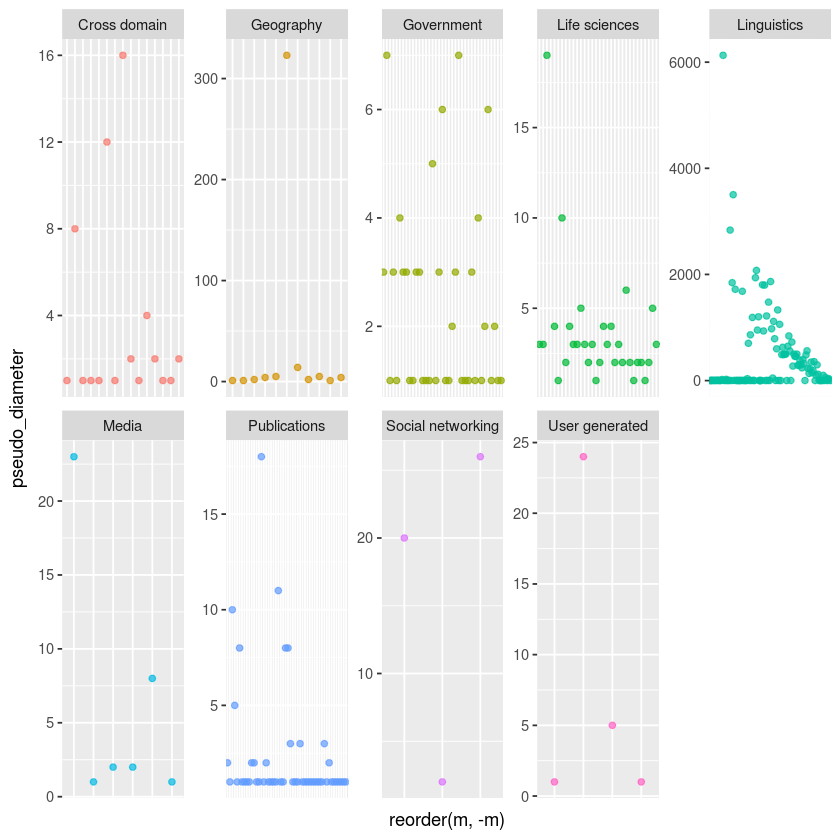

In [15]:
diameter_plot <- ggplot(data=results, aes(x=reorder(m, -m), y=pseudo_diameter, color=domain)) 
diameter_plot <- diameter_plot + geom_point(alpha=0.7)
diameter_plot <- diameter_plot + facet_wrap(~ domain, scale="free", nrow=2)
diameter_plot <- diameter_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + guides(color=FALSE)
diameter_plot

In [16]:
# Datasets with the largest pseudo-diameter values per domain.
max_diameter <- results %>% group_by(domain) %>% summarise(pseudo_diameter = max(pseudo_diameter,na.rm = TRUE))
max_diameter <- merge.data.frame(max_diameter, results)
max_diameter[c("domain", "name", "pseudo_diameter")]

domain,name,pseudo_diameter
Cross domain,sandrart-net,16
Geography,nuts-geovocab,323
Government,statistics-data-gov-uk,7
Government,ecb-linked-data,7
Life sciences,bio2rdf-irefindex,19
Linguistics,universal-dependencies-treebank-russian-syntagrus,6129
Media,data-incubator-discogs,23
Publications,vivo-indiana-university,18
Social networking,vivo-scripps-research-institute,26
User generated,my-experiment,24


# Degree Distribution Statistics

## Powerlaw Exponent Degree

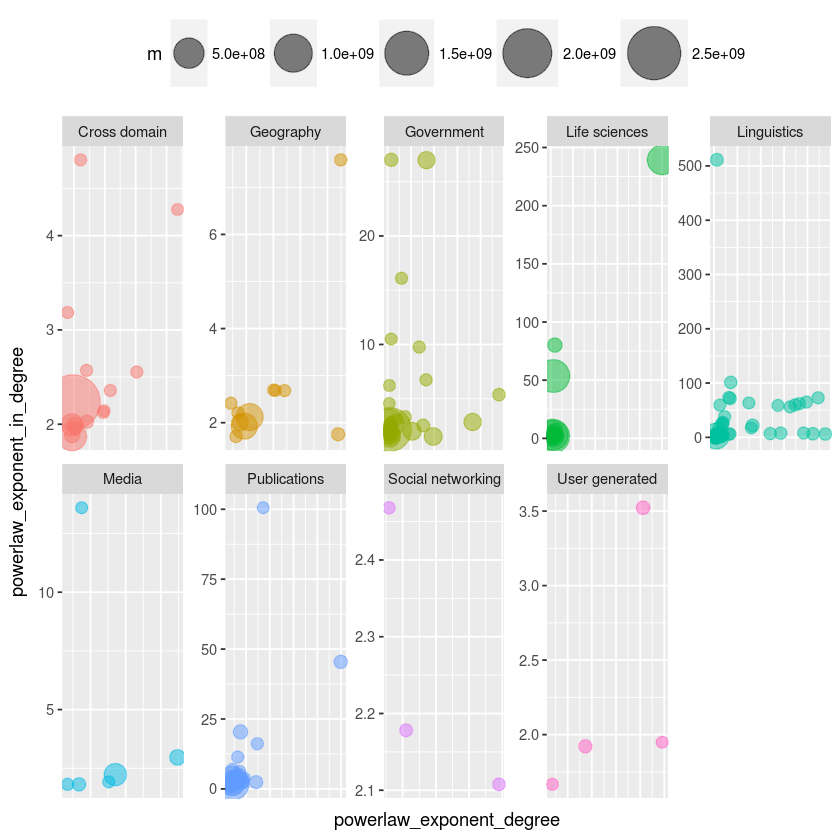

In [17]:
powerlaw_plot <- ggplot(data=results, aes(x=powerlaw_exponent_degree, y=powerlaw_exponent_in_degree, color=domain)) 
powerlaw_plot <- powerlaw_plot + geom_point(aes(size=m), alpha=0.5) + scale_size_continuous(range = c(3,15))
powerlaw_plot <- powerlaw_plot + facet_wrap(~ domain, scale="free", nrow=2)
powerlaw_plot <- powerlaw_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank(), legend.position="top") + guides(color=FALSE)
powerlaw_plot

In [18]:
# Mean degrees accross domains.
powerlaw_results <- melt(results, id.vars=c("domain", "name", "m"), measure.vars=c("powerlaw_exponent_degree", "powerlaw_exponent_in_degree"), variable.name="var")
powerlaw_table <- aggregate(value~var+domain, data=powerlaw_results, FUN="mean")
powerlaw_table <- dcast(powerlaw_table, domain~var) 
powerlaw_table

domain,powerlaw_exponent_degree,powerlaw_exponent_in_degree
Cross domain,2.615584,2.531514
Geography,2.814295,2.706811
Government,14.669294,4.709554
Life sciences,6.464038,13.856193
Linguistics,13.670632,14.188854
Media,2.205315,4.056795
Publications,3.499621,6.415004
Social networking,1.972917,2.251292
User generated,2.890987,2.264954


#  Descriptive Statistical Measures

## Coefficient of Variation

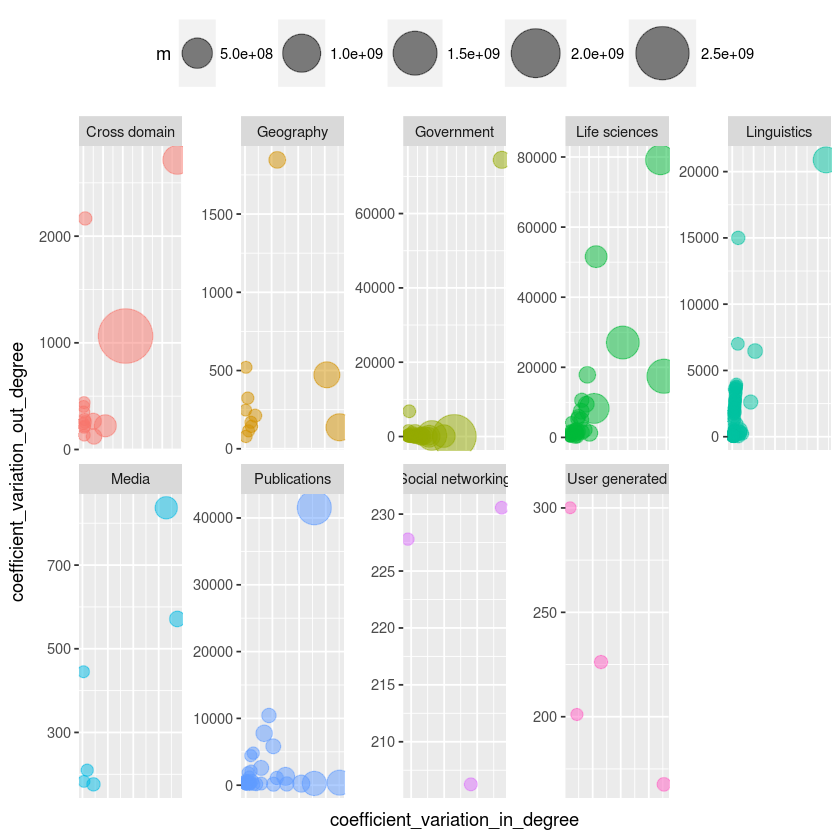

In [19]:
variation_plot <- ggplot(data=results, aes(x=coefficient_variation_in_degree, y=coefficient_variation_out_degree, color=domain)) 
variation_plot <- variation_plot + geom_point(aes(size=m), alpha=0.5) + scale_size_continuous(range = c(3,15))
variation_plot <- variation_plot + facet_wrap(~ domain, scale="free", nrow=2)
variation_plot <- variation_plot + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank(), legend.position="top") + guides(color=FALSE)
variation_plot

# Correlation Analysis

In [20]:
library("corrplot")

corrplot 0.84 loaded


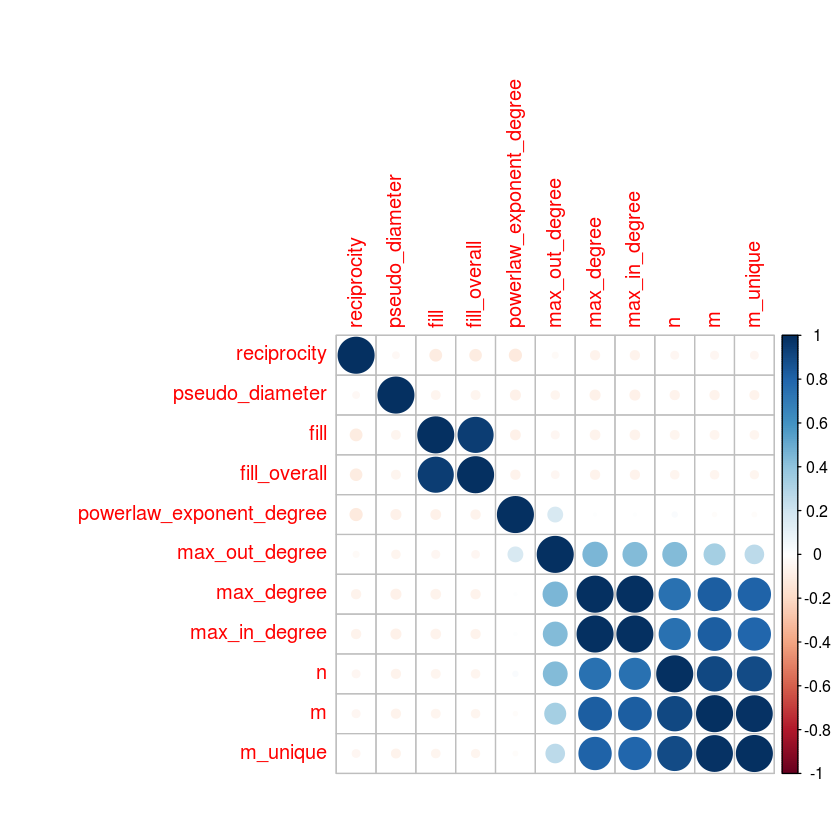

In [21]:
cor_results <- cor(results[c("n", "m", "m_unique", "max_degree", "max_in_degree", "max_out_degree", "fill", "fill_overall", "reciprocity", "pseudo_diameter", "powerlaw_exponent_degree")], use = "pairwise.complete.obs")
corrplot(cor_results, order = "hclust")